In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('Dataset/dataset.csv')
df.head()

,X,Y,Z,Mixed,ClassLabel
0,0.125022,0.094986,0.001297,0.157018,1
1,0.150710,0.083282,-0.023514,0.173788,1
2,0.102941,0.111084,0.010075,0.151782,1
3,0.038450,0.049911,0.007511,0.063451,1
4,-0.029148,-0.105423,0.017124,0.110711,1


In [3]:
person1 = df[df['ClassLabel'] == 1]
person1.head()

,X,Y,Z,Mixed,ClassLabel
0,0.125022,0.094986,0.001297,0.157018,1
1,0.150710,0.083282,-0.023514,0.173788,1
2,0.102941,0.111084,0.010075,0.151782,1
3,0.038450,0.049911,0.007511,0.063451,1
4,-0.029148,-0.105423,0.017124,0.110711,1


In [4]:
y = person1['X'].values

In [5]:
x = [i for i in range(100)]

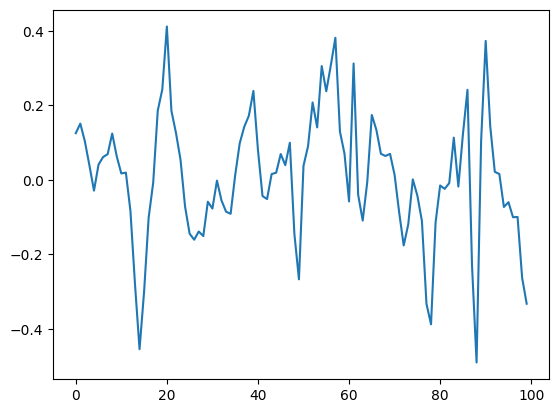

In [6]:
plt.plot(x,y[:100])

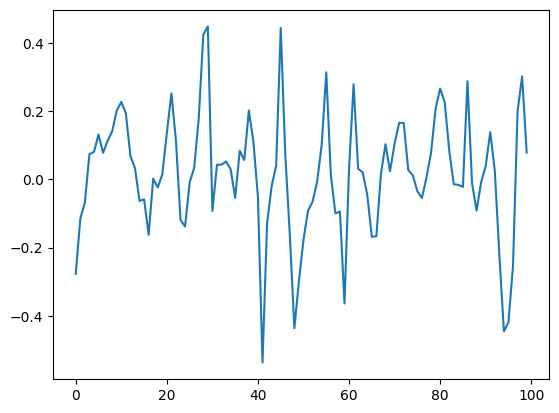

In [7]:
plt.plot(x,y[100:200])

In [8]:
person2 = df[df['ClassLabel'] == 2]
person2.head()

,X,Y,Z,Mixed,ClassLabel
990,-0.070675,-0.019684,0.053207,0.090628,2
991,0.004678,0.007584,0.003845,0.009705,2
992,0.027570,0.055161,-0.024719,0.066437,2
993,0.005837,-0.010391,-0.033699,0.035745,2
994,3490.000000,-0.025742,-0.022507,0.034195,2


In [9]:
y2 = person2['X'].values

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
y2 = remove_outliers(person2, 'X')

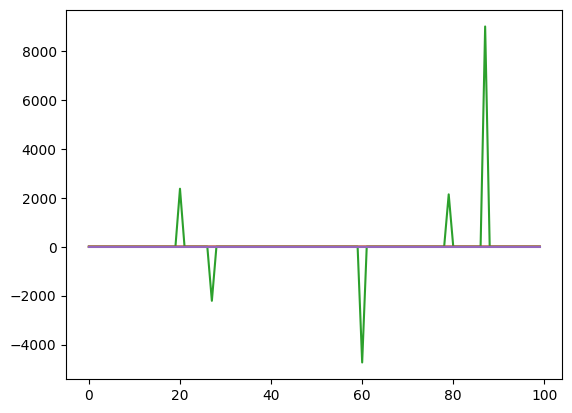

In [12]:
plt.plot(x,y2[:100])

In [13]:
df.describe()

,X,Y,Z,Mixed,ClassLabel
count,5035.000000,5035.000000,5.035000e+03,5035.000000,5035.000000
mean,0.521365,4.697800,-2.947934e+02,0.244225,3.002781
std,318.671126,233.800423,2.026480e+04,0.192936,1.409145
min,-9720.000000,-8850.000000,-1.437653e+06,0.001157,1.000000
25%,-0.069452,-0.100594,-6.593132e-02,0.094546,2.000000
50%,-0.001627,0.007843,-3.307343e-03,0.196968,3.000000
75%,0.071264,0.124863,5.086803e-02,0.343273,4.000000
max,8960.000000,7630.000000,9.000000e+03,0.995577,5.000000


## Create Features

In [14]:
person1 = df[df['ClassLabel'] == 1]
person2 = df[df['ClassLabel'] == 2]
person3 = df[df['ClassLabel'] == 2]
person4 = df[df['ClassLabel'] == 4]
person5 = df[df['ClassLabel'] == 5]

In [15]:
all_metrics = []

In [16]:
person1.describe()

,X,Y,Z,Mixed,ClassLabel
count,990.000000,990.000000,9.900000e+02,990.000000,990.0
mean,8.597205,9.358466,-1.461744e+03,0.294312,1.0
std,253.758023,196.913909,4.569190e+04,0.182525,0.0
min,-664.000000,-0.935265,-1.437653e+06,0.017688,1.0
25%,-0.090341,-0.131977,-1.207523e-01,0.159471,1.0
50%,0.007939,0.020149,-1.439858e-02,0.251552,1.0
75%,0.112653,0.166428,9.453487e-02,0.386964,1.0
max,7930.000000,4730.000000,9.920000e+02,0.995177,1.0


In [17]:
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['X', 'Y', 'Z', 'Mixed']:
    person1 = remove_outliers_iqr(person1, col)

In [18]:
person1.describe()

,X,Y,Z,Mixed,ClassLabel
count,894.000000,894.000000,894.000000,894.000000,894.0
mean,0.012167,0.016954,-0.013367,0.260309,1.0
std,0.151538,0.210303,0.135724,0.135275,0.0
min,-0.390434,-0.564491,-0.407749,0.017688,1.0
25%,-0.081545,-0.118315,-0.114347,0.154367,1.0
50%,0.006878,0.020496,-0.014202,0.238284,1.0
75%,0.108267,0.154333,0.087854,0.352499,1.0
max,0.411351,0.602829,0.387684,0.656086,1.0


In [19]:
def calculate_metrics(window):
    mean = window.mean()
    std_dev = window.std()
    energy = np.sum(np.square(window))
    hist = np.histogram(window, bins=10, density=True)[0]
    entropy = -np.sum(hist * np.log2(hist + 1e-10))
    peaks, _ = find_peaks(window, height=0)
    num_peaks = len(peaks)
    return mean, std_dev, energy, entropy, num_peaks

In [20]:
window_size = 100
metrics = {
}

for col in ['X', 'Y', 'Mixed']:
    for metric_name in ['Mean', 'Std Dev', 'Energy', 'Entropy', 'Peaks']:
        metrics[f'{metric_name}_{col}'] = []

In [21]:
metrics

{'Mean_X': [],
 'Std Dev_X': [],
 'Energy_X': [],
 'Entropy_X': [],
 'Peaks_X': [],
 'Mean_Y': [],
 'Std Dev_Y': [],
 'Energy_Y': [],
 'Entropy_Y': [],
 'Peaks_Y': [],
 'Mean_Mixed': [],
 'Std Dev_Mixed': [],
 'Energy_Mixed': [],
 'Entropy_Mixed': [],
 'Peaks_Mixed': []}

In [22]:
for i in range(0, len(person1)):
    for col in ['X', 'Y', 'Mixed']:
        window = person1[col].iloc[i:i + window_size]
        mean, std_dev, energy, entropy, num_peaks = calculate_metrics(window)
        metrics[f'Mean_{col}'].append(mean)
        metrics[f'Std Dev_{col}'].append(std_dev)
        metrics[f'Energy_{col}'].append(energy)
        metrics[f'Entropy_{col}'].append(entropy)
        metrics[f'Peaks_{col}'].append(num_peaks)

result_df = pd.DataFrame(metrics)

In [23]:
result_df['category'] = 1

In [24]:
all_metrics.append(result_df)

In [25]:
for col in ['X', 'Y', 'Z', 'Mixed']:
    person2 = remove_outliers_iqr(person2, col)